## CS-E4825 - Probabilistic Machine Learning D (spring 2025)

Pekka Marttinen, Negar Safinianaini, Mihriban Kocak, Bo Zheng, Batuhan Avci.

## Exercise 2, due on Friday 24th January at 10:15.

### Contents
1. Problem 1: Computing conditional probability
2. Problem 2: Conditional independence from Bayesian network
3. Problem 3: Burden of specification
4. Problem 4: Medical diagnosis



## Problem 1: Computing conditional probability

Consider the Bayesian network in figure below which represents Mr Holmes’ burglary worries: (B)urglar, (A)larm, (W)atson, Mrs (G)ibbon. All variables are binary with states $\{\mathsf{tr}, \mathsf{fa}\}$. 

![figure title](holmes_dag.png)

The probabilities are

\begin{align*}
    p(B = \mathsf{tr}) &= 0.01 && \\
    p(A = \mathsf{tr}|B = \mathsf{tr}) &= 0.99 & p(A = \mathsf{tr}|B = \mathsf{fa}) &= 0.05 \\
    p(W = \mathsf{tr}|A = \mathsf{tr}) &= 0.90 & p(W = \mathsf{tr}|A = \mathsf{fa}) &= 0.5 \\
    p(G = \mathsf{tr}|A = \mathsf{tr}) &= 0.7  & p(G = \mathsf{tr}|A = \mathsf{fa}) &= 0.2 \\
\end{align*}
Compute the conditional probabilities

__(a)__ \\(p(B = \mathsf{tr}|W = \mathsf{tr})\\)

__(b)__ \\(p(B = \mathsf{tr}|W = \mathsf{tr}, G = \mathsf{fa})\\)

Write your solutions in LateX or attach a picture in the answer cell provided below. You can add a picture using the command ```!(imagename_in_the_folder.jpg)```. Latex in here works similarly as you would write it normally! You can use some of the definitions from the exercise description as a reference. The list of valid Latex commands in Jypyter notebook can be found here: http://www.onemathematicalcat.org/MathJaxDocumentation/TeXSyntax.htm


$\textbf{(a)} \ p(B = \text{tr} \ | \ W = \text{tr}) = \frac{p(B = \text{tr}) \ p(W=\text{tr} \ | \ B = \text{tr})}{p(W = \text{tr})}$ 

$p(W=\text{tr}) = p(W=\text{tr} \ | \ A=\text{tr}) \ p(A=\text{tr}) + p(W = tr \ | \ A = \text{fa}) \ p(A = \text{fa})$

$p(A = \text{tr}) = p(A = \text{tr} \ | \ B = \text{tr}) \ p(B = \text{tr}) + p(A = \text{tr} \ | \ B = \text{fa}) \ p(B = \text{fa}) = 0.99 \cdot 0.01 + 0.05 \cdot 0.99 = \frac{297}{5000}$

$\Rightarrow p(A = \text{fa}) = 1 - p(A = \text{tr}) = 1 - \frac{297}{5000} = \frac{4703}{5000}$

$\Rightarrow p(W=\text{tr}) = 0.90 \cdot \frac{297}{5000} + 0.50 \cdot \frac{4703}{5000} = \frac{6547}{12500}$

Now the last piece of the puzzle we need to figure out is:

$p(W=\text{tr} \ | \ B = \text{tr}) = p(W=\text{tr} \ | \ A = \text{tr}) \ p(A=\text{tr} \ | \ B = \text{tr}) + p(W=\text{tr} \ | \ A = \text{fa}) \ p(A=\text{fa} \ | \ B = \text{tr}) = 0.90 \cdot 0.99 + 0.5 \cdot (1-0.99) = \frac{112}{125}$

Finally thus the asked probability is: $\Rightarrow p(B = \text{tr} \ | \ W = \text{tr}) = \frac{0.01 \cdot \frac{112}{125}}{\frac{6547}{12500}} = \frac{112}{6547} \approx 0.017107$

$\textbf{(b)} \ p(B = \text{tr} \ | \ W = \text{tr}, G = \text{fa}) = \frac{p(B = \text{tr} \ \cap \ W=\text{tr} \ \cap \ G = \text{fa})}{p(W = \text{tr} \ \cap \ G = \text{fa})} $ 

$ p(W = \text{tr} \ \cap \ G = \text{fa}) = p(W = \text{tr} \ \cap \ G = \text{fa} \ | \ A = \text{tr}) \ p(A = \text{tr}) +  p(W = \text{tr} \ \cap \ G = \text{fa} \ | \ A = \text{fa}) \ p(A = \text{fa}) $

$ p(W = \text{tr} \ \cap \ G = \text{fa} \ | \ A = \text{tr}) = p(W = \text{tr} \ | \ A = \text{tr}) \ p(G = \text{fa} \ | \ A = \text{tr}) = 0.9 \cdot (1-0.7) = \frac{27}{100}  $, since W and G are independent when conditioned by A.

Similarly: $ p(W = \text{tr} \ \cap \ G = \text{fa} \ | \ A = \text{fa}) = p(W = \text{tr} \ | \ A = \text{fa}) \ p(G = \text{fa} \ | \ A = \text{fa}) = 0.5 \cdot (1-0.2) = 0.4 $

And in part a) we got that: $ p(A = \text{tr}) = \frac{297}{5000} $ and $ p(A = \text{fa}) = \frac{4703}{5000} $

Putting these together we get: $ p(W = \text{tr} \ \cap \ G = \text{fa}) = p(W = \text{tr} \ \cap \ G = \text{fa} \ | \ A = \text{tr}) \ p(A = \text{tr}) +  p(W = \text{tr} \ \cap \ G = \text{fa} \ | \ A = \text{fa}) \ p(A = \text{fa}) = \frac{27}{100} \cdot \frac{297}{5000} + 0.4 \cdot \frac{4703}{5000} = \frac{8019}{50000} + \frac{18812}{50000} = \frac{26831}{50000}$

Next up let's look at the numerator and let us condition it by A using the law of total probability and the structure of the network given. When we condition by A, G and W become independent:

$ p(B = \text{tr} \ \cap \ W=\text{tr} \ \cap \ G = \text{fa}) = p(B = \text{tr}) ( p(A = \text{tr} \ | \ B=\text{tr}) \ p(W=\text{tr} \ | \ A = \text{tr}) \ p(G=\text{fa} \ | \ A = \text{tr}) +  p(A = \text{fa} \ | \ B=\text{tr}) \ p(W=\text{tr} \ | \ A = \text{fa}) \ p(G=\text{fa} \ | \ A = \text{fa})) = 0.01 \cdot (0.99 \cdot 0.9 \cdot (1-0.7) + (1-0.99) \cdot 0.5 \cdot (1-0.2)) = 0.002713$

Now we can combine the subresults to get the wanted probability:

$ p(B = \text{tr} \ | \ W = \text{tr}, G = \text{fa}) = \frac{p(B = \text{tr} \ \cap \ W=\text{tr} \ \cap \ G = \text{fa})}{p(W = \text{tr} \ \cap \ G = \text{fa})} = \frac{0.002713}{\frac{26831}{50000}} = \frac{2713}{536620} \approx 0.0050557$

## Problem 2: Conditional independence from Bayesian network

Based on the Bayesian network in [figure](markov.png) below, which of the following conditional independence statements follow? 
For each statement, give a ''true/false'' answer; for the false statements, also mention a path between the two nodes that is not blocked. (see [Barber: Bayesian Reasoning and Machine Learning](http://web4.cs.ucl.ac.uk/staff/D.Barber/pmwiki/pmwiki.php?n=Brml.Online),ch. 3.3.4)

![markov](markov.png)
\
\begin{align}
(a)\ \ A \perp\!\!\!\perp  B \mid C && (c)\ \ C \perp\!\!\!\perp E \mid B,D &&(e)\ \ B \perp\!\!\!\perp F \mid A,C\\
(b)\ \ A \perp\!\!\!\perp B \mid \emptyset && (d)\ \ C \perp\!\!\!\perp D \mid A,B &&(f)\ \ A \perp\!\!\!\perp E \mid D,F
\end{align}

Furthermore, find a Bayesian network that is *Markov equivalent* to the network in the above [figure](markov.png). (see [Barber: Bayesian Reasoning and Machine Learning](http://web4.cs.ucl.ac.uk/staff/D.Barber/pmwiki/pmwiki.php?n=Brml.Online),ch. 3.3.6)

Write your solution in LateX or attach a picture of the solution in the cell below.


(a) false, non-blocked path: A, C, B, since C is a collider and trivially C belongs to {C} and thus the path is not blocked

(b) true, due to d-separation

(c) false, non-blocked path: C, A, F, E, since neither A or F are colliders and they are not in {B,D}

(d) false, non-blocked path: C, D trivial

(e) true, due to d-separation

(f) false, non-blocked path: A, C, B, E, since even though C is a collider, one of its descendants D belongs to {D,F}

The following Bayesian network is Markov equivalent to the network in the above. The only difference is the direction of the arrow between A and F.

![](markov_equivalent.png)

## Problem 3: Burden of specification

Consider a distribution of five binary variables $x_i$.

__(a)__ What is the number of parameters needed to define the distribution $p(x_1,x_2,x_3,x_4,x_5)$ if no assumptions are made, i.e. $p$ is an arbitrary distribution.

__(b)__ How about if the Bayesian network in [figure](chain.png) below is assumed, i.e. $p$ factorizes as implied by the graph. 

__(c)__ And how about if, additionally to (b), we assume that the conditional distributions are shared, i.e. $p(x_{i+1}\mid x_i)=p(x_{i}\mid x_{i-1})$, $i=2,3,4$?

![figure](chain.png)

Write your solution in LateX or attach a picture of the solution in the cell below.


$\textbf{(a)}$ Given that all of the five random variables are binary variables (two possible values), we can say that we may use at most two non-redundant parameters to combine all of the possible values of a binary variable (for example $\alpha x_i + \beta (1-x_i)$). Therefore we need $2 \times 2 \times 2 \times 2 \times 2 = 32$ parameters. But actually only 31 is needed, since one of these is solvable since $p$ is an probability distribution meaning that the sum over all possible states must be equal to one. So final answer: $\textbf{31}$.

$\textbf{(b)}$ First the prior $p(x_1)$ needs only one parameter, since $x_1$ is a binary variable ($2 - 1 = 1$). Then $p(x_2 \ | \ x_1)$, which can be though of as the sum of two distributions: $p(x_2 \ | \ x_1 = 0)$ and $p(x_2 \ | \ x_1 = 1)$, which both need just one parameter, so in total 2 parameters here. And now we notice that this pattern of the conditional distributions always needing 2 parameters. So in total we have: $1 + 2 + 2 + 2 + 2 = \mathbf{9}$ parameters.

$\textbf{(c)}$ In the case that the conditional distributions are always the same, we have $1 + 2 = \mathbf{3}$ parameters only.

## Problem 4: Medical diagnosis

Let's have the following notation:

| Notation    | Explanation                                      |
|-------------|--------------------------------------------------|
| $A = 1$<br> | A person has brain cancer                        |
| $B = 1$     | A person has a high blood calcium level          |
| $C = 1$     | A person has a brain tumor                       |
| $D = 1$     | A person has seizures that cause unconsciousness |
| $E = 1$     | A person has severe headaches                    |


An expert has told us the following information about the relationships between variables:

>Probability of severe headaches $P(E = 1)$ depends only on the fact whether a person has a brain tumor ($C$) or not. On the other hand, if one knows the blood calcium level ($B$) and whether the person has a tumor or not ($C$), one can specify the probability of unconsciousness seizures $P(D = 1)$. In this case, the probability of $D$ doesn't depend on the presence of the headaches ($E$) or (directly) on the fact whether the person has brain cancer or not  ($A$). The probability of a brain tumor ($C$) depends directly only on the fact, whether the person has brain cancer or not ($A$).

Construct a DAG which represents (exactly) the causal statements specified by the expert.
Furthemore, write down the conditional independencies corresponding the description of the expert and verify that this conforms with those implied by the DAG.
Finally, write down the joint distribution $P(A, B, C, D, E)$ factorized according to the DAG.

Write your solution in LateX or attach a picture of the solution in the cell below.


The DAG is represented like this:

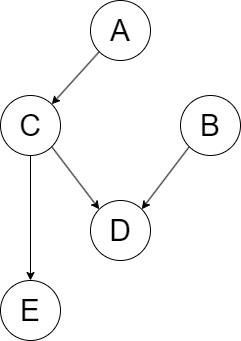

The conditional independencies based on the task description above are as follows:

$(D \perp\!\!\!\!\!\perp E) \ | \ C$

$(D \perp\!\!\!\!\!\perp A) \ | \ C$

$(E \perp\!\!\!\!\!\perp A) \ | \ C$

$B \perp\!\!\!\!\!\perp A$

$B \perp\!\!\!\!\!\perp C$

$B \perp\!\!\!\!\!\perp E$

The joint distribution can be written like so with the information gathered from the expert:

$P(A, B, C, D, E) = P(A) \ P(B) \ P(C \ | \ A) \ P(D \ | \ B, C) \ P(E \ | \ C)$